# Mean Varicance Standard Deviation Calculator

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
ls = range(9)
ls

range(0, 9)

In [11]:
arr = np.array(ls).reshape(3, 3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [12]:
methods = {
    'mean': np.mean,
    'variance': np.var,
    'standard deviation': np.std,
    'max': np.max,
    'min': np.min,
    'sum': np.sum
}

def allAxis(arr, method):
  return [method(arr, ax).tolist() for ax in [0, 1, None]]

In [13]:
allAxis(arr, methods['mean'])

[[3.0, 4.0, 5.0], [1.0, 4.0, 7.0], 4.0]

In [14]:
{key: allAxis(arr, value) for key, value in methods.items()}

{'mean': [[3.0, 4.0, 5.0], [1.0, 4.0, 7.0], 4.0],
 'variance': [[6.0, 6.0, 6.0],
  [0.6666666666666666, 0.6666666666666666, 0.6666666666666666],
  6.666666666666667],
 'standard deviation': [[2.449489742783178,
   2.449489742783178,
   2.449489742783178],
  [0.816496580927726, 0.816496580927726, 0.816496580927726],
  2.581988897471611],
 'max': [[6, 7, 8], [2, 5, 8], 8],
 'min': [[0, 1, 2], [0, 3, 6], 0],
 'sum': [[9, 12, 15], [3, 12, 21], 36]}

# Demographic Data Analyis

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv("adult.data.csv", na_values=['?'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
# How many of each race are represented in this dataset?
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [19]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [20]:
# What is the average age of men?
df.loc[df['sex'] == 'Male']['age'].mean()

39.43354749885268

In [21]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [22]:
# What is the percentage of people who have a Bachelor's degree?
df['education'].value_counts(normalize=True)['Bachelors'] * 100

16.44605509658794

In [23]:
# with and without `Bachelors`, `Masters`, or `Doctorate`
higher_education = df.loc[(df['education'] == 'Bachelors') | (df['education'] == 'Masters') | (df['education'] == 'Doctorate')]
lower_education = df.loc[(df['education'] != 'Bachelors') & (df['education'] != 'Masters') & (df['education'] != 'Doctorate')]

In [24]:
# percentage with salary >50K
higher_education_rich = higher_education['salary'].value_counts(normalize=True)['>50K'] * 100
lower_education_rich = lower_education['salary'].value_counts(normalize=True)['>50K'] * 100
print(higher_education_rich)
print(lower_education_rich)

46.535843011613935
17.3713601914639


In [25]:
# What is the minimum number of hours a person works per week (hours-per-week feature)?
min_work_hours = df['hours-per-week'].min()
min_work_hours

1

In [26]:
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
num_min_workers = df.loc[df['hours-per-week'] == min_work_hours]

rich_percentage = num_min_workers['salary'].value_counts(normalize=True)['>50K'] * 100
rich_percentage

10.0

In [27]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [28]:
# What country has the highest percentage of people that earn >50K?
country_high_salaries = df.loc[df['salary'] == '>50K']['native-country'].value_counts() / df['native-country'].value_counts()
country_salaries = df['native-country'].value_counts()
high_earning_perc_per_country = country_high_salaries / country_salaries * 100
high_earning_perc_per_country

Cambodia                      1.939058
Canada                        0.266375
China                         0.355556
Columbia                      0.057455
Cuba                          0.277008
Dominican-Republic            0.040816
Ecuador                       0.510204
El-Salvador                   0.080100
England                       0.370370
France                        1.426873
Germany                       0.234429
Greece                        0.951249
Guatemala                     0.073242
Haiti                         0.206612
Holand-Netherlands                 NaN
Honduras                      0.591716
Hong                          1.500000
Hungary                       1.775148
India                         0.400000
Iran                          0.973499
Ireland                       0.868056
Italy                         0.469131
Jamaica                       0.152416
Japan                         0.624350
Laos                          0.617284
Mexico                   

In [29]:
highest_earning_country = high_earning_perc_per_country.idxmax()
highest_earning_country

'Yugoslavia'

In [30]:
highest_earning_country_percentage = round(high_earning_perc_per_country[highest_earning_country], 1)
highest_earning_country_percentage

2.3

In [31]:
# Identify the most popular occupation for those who earn >50K in India.
india_rich_per_occupation = df.loc[(df['native-country'] == 'India') & (df['salary'] == '>50K')]['occupation'].value_counts()
india_rich_per_occupation.idxmax()

'Prof-specialty'

# Medical Data Visualizer

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [33]:
df = pd.read_csv("medical_examination.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49962 entries, 0 to 49961
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49962 non-null  int64  
 1   age          49961 non-null  float64
 2   sex          49961 non-null  float64
 3   height       49961 non-null  float64
 4   weight       49961 non-null  float64
 5   ap_hi        49961 non-null  float64
 6   ap_lo        49961 non-null  float64
 7   cholesterol  49961 non-null  float64
 8   gluc         49961 non-null  float64
 9   smoke        49961 non-null  float64
 10  alco         49961 non-null  float64
 11  active       49961 non-null  float64
 12  cardio       49961 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 5.0 MB


In [35]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,49962.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000,49961.000000
mean,35675.447640,19464.684094,1.347311,164.366166,74.230610,128.747183,96.972118,1.363504,1.225856,0.088209,0.053402,0.802626,0.499049
std,20609.949001,2469.041025,0.476499,8.190134,14.327859,154.515534,200.225599,0.677197,0.572023,0.283601,0.224835,0.398021,0.500004
min,0.000000,10798.000000,1.000000,55.000000,11.000000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17834.500000,17662.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,35681.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,53507.750000,21321.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,71310.000000,23690.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,2,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,3,17623.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,4,17474.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0


In [37]:
# add overwight column (calculated using BMI)
df['overweight'] = ((df['weight'] / (df['height'] / 100) ** 2) > 25) * 1

In [38]:
# normalize cholesterol and gluc values
df['cholesterol'] = (df['cholesterol'] > 1) * 1
df['gluc'] = (df['gluc'] > 1) * 1

In [39]:
df_melted = df.melt(id_vars='cardio',value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
series_melted = df_melted.groupby(['cardio', 'variable'])['value'].value_counts()
df_melted = series_melted.to_frame(name='total').reset_index()

In [40]:
df_melted

,cardio,variable,value,total
0,0.0,active,1.0,20466
1,0.0,active,0.0,4562
2,0.0,alco,0.0,23637
3,0.0,alco,1.0,1391
4,0.0,cholesterol,0.0,21004
5,0.0,cholesterol,1.0,4024
6,0.0,gluc,0.0,22079
7,0.0,gluc,1.0,2949
8,0.0,overweight,1.0,13681
9,0.0,overweight,0.0,11347


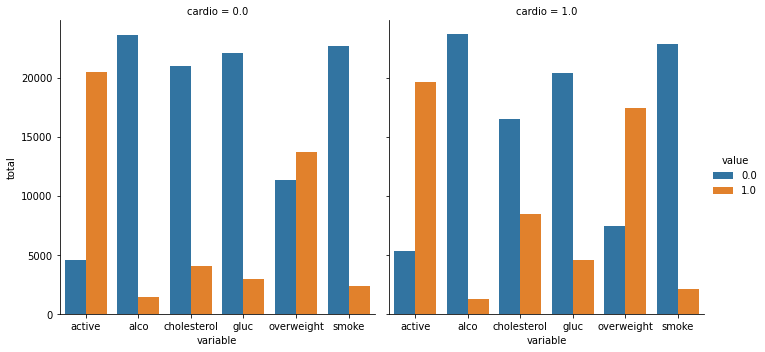

In [41]:
fig = sns.catplot(data=df_melted, kind='bar', x='variable', y='total', col='cardio', hue='value')

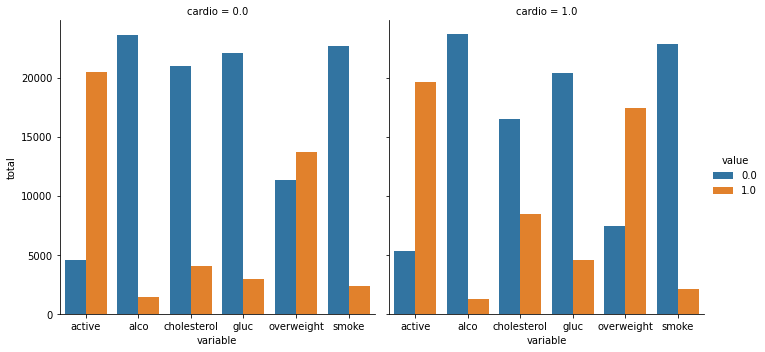

In [42]:
fig.figure

In [43]:
# clean values
ap_filter = (df['ap_lo'] <= df['ap_hi'])
h_filter = (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))
w_filter = (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))
df_heat = df[ap_filter & h_filter & w_filter]
df_heat.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393.0,2.0,168.0,62.0,110.0,80.0,0,0,0.0,0.0,1.0,0.0,0
1,1,20228.0,1.0,156.0,85.0,140.0,90.0,1,0,0.0,0.0,1.0,1.0,1
2,2,18857.0,1.0,165.0,64.0,130.0,70.0,1,0,0.0,0.0,0.0,1.0,0
3,3,17623.0,2.0,169.0,82.0,150.0,100.0,0,0,0.0,0.0,1.0,1.0,1
4,4,17474.0,1.0,156.0,56.0,100.0,60.0,0,0,0.0,0.0,0.0,0.0,0


In [44]:
# calculate correlation matrix
corr = df_heat.rename(columns={'sex': 'gender'}).corr().round(1)

In [45]:
# generate mask for upper triangle
mask = np.triu(np.ones(corr.shape, dtype='bool'))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

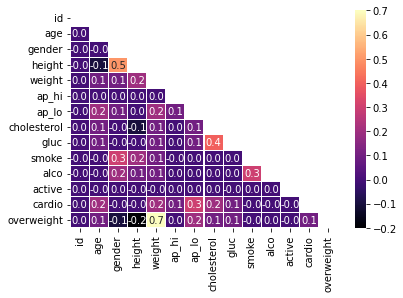

In [46]:
# set matplotlib figure
fig, ax = plt.subplots()
sns.heatmap(corr, mask=mask, ax=ax, annot=True, linecolor='white', linewidth='0.1', fmt='.1f', cmap='magma')

# Page View Time Series Visualizer

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [48]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col='date', parse_dates=['date'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [50]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [51]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [52]:
df_line = df.copy()

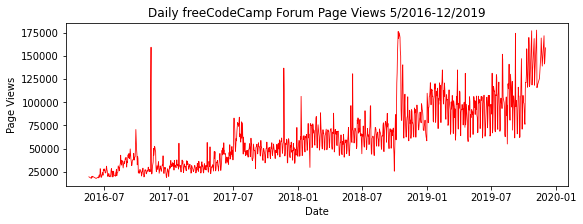

In [53]:
fig, ax = plt.subplots(figsize=(9, 3))
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.plot(df_line, color='r', linewidth=0.8)

In [54]:
df_bar = df.copy().reset_index()

In [55]:
df_bar = df.copy().reset_index()
df_bar['year'] = df_bar['date'].dt.year
df_bar['month'] = df_bar['date'].dt.month
df_bar = df_bar.drop(columns=['date']).groupby(['year', 'month']).mean().reset_index()#.rename(columns={'value': 'val'})
df_bar.head()

,year,month,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667


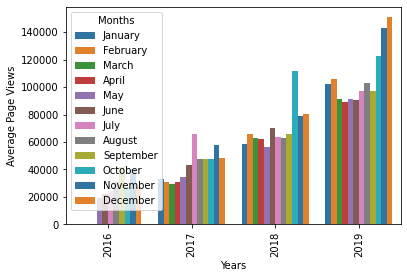

In [56]:
fig, ax = plt.subplots()
sns.barplot(data=df_bar, ax=ax, x='year', y='value', hue='month', palette=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:grey', 'tab:olive', 'tab:cyan'])
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title='Months')
sns.move_legend(ax, "upper left")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [57]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0, 0.5, 'Page Views')

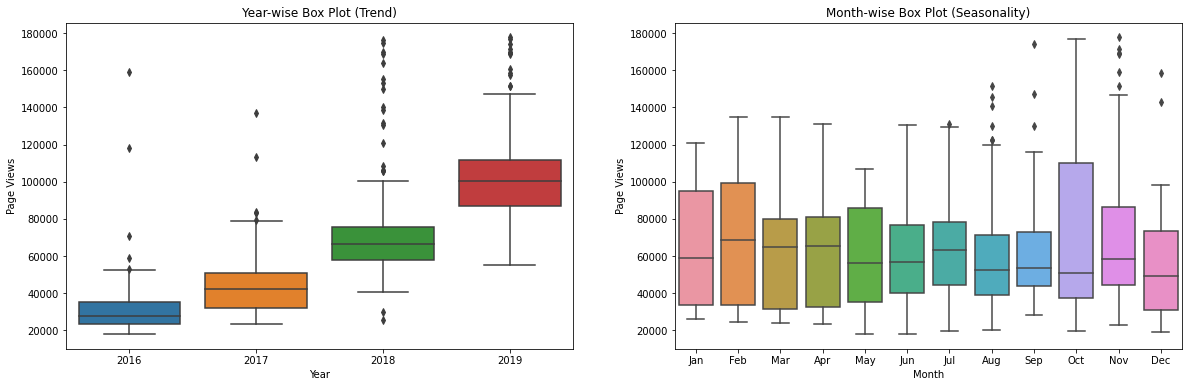

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(data=df_box, ax=ax1, x='year', y='value')
sns.boxplot(data=df_box, ax=ax2, x='month', y='value', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')

# Sea Level Predictor

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [60]:
df = pd.read_csv('epa-sea-level.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [62]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


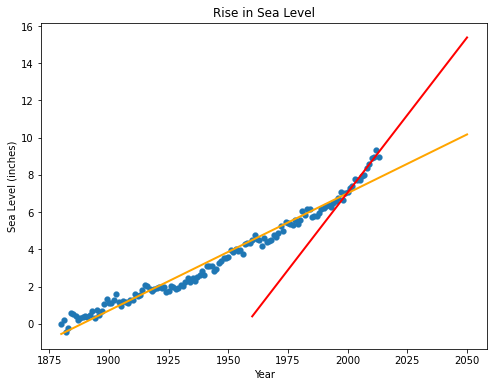

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], linewidths=0.2)
ax.set_title('Rise in Sea Level')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
res1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
x1 = np.linspace(1880, 2050)
ax.plot(x1, res1.slope * x1 + res1.intercept, color='orange', linewidth=2)

# 2000 and forward
df_recent = df.loc[df['Year'] >= 2000]
res2 = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
x2 = np.linspace(1960, 2050)
ax.plot(x2, res2.slope * x2 + res2.intercept, color='red', linewidth=2)
